In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

**This lab is an optional group lab.** You can choose to work alone or in a group of up to four students. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one of your GitHub repos.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.com/UBC-MDS/DSCI_573_lab4_PENG_GAOXIANG.git

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

For a credit card company, it is important that they are able to predict if some of their clients default on credit card payments. The effectiveness and efficiency of the prediction will help credit card issuers to take proactive approaches to minimize the operational risks. This project is to train a machine learning classifier based on a [Default of Credic Card Clients Dataset](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset) from Kaggle to tackle the prediction problem.
   
The dataset has 30,000 observations with 25 variables that may be associated to whether the client defaulted or not on their next month payment. As an industrial standard, if after six months in a row of not making at least the minimum payment due, the card would be seriously delinquent. These variables provide information including credit limits, clients' gender, educational level, marriage status, age, repayment status, billed amount, and previous payments. With this big amount of data and useful features available, intuitively we should be able to find a good model.   

One thing has to be pointed out that the data was collected from Taiwan. We need to be cautious when deploying our trained model in other regions if there are significant differences in terms of the consumer behavior and the financial system. Also, we should be aware that the data only contains information from April 2005 to September 2005. That means the model may be not reliable to predict default for other months in a year if the seasonal affect exists, and it might be less accurate if being used in a particular period, such as during COVID-19 pandemic. Therefore, we acknowledge the project is mostly for learning purposes here in UBC MDS program.

In [36]:
# Import libraries needed for this lab
import shap
import altair as alt
import altair_ally as aly
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import (
    FunctionTransformer,
    Normalizer,
    OneHotEncoder,
    StandardScaler,
    normalize,
    scale)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.svm import SVC, SVR
alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')
from scipy.stats import loguniform, randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [37]:
# read raw data as pandas dataframe
credit_card_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [38]:
# drop unnecessary column "ID"
credit_card_df = credit_card_df.drop("ID", axis=1)

# Both 5 and 6 of EDUCATION refer to unkown value from the kaggle description. Combine those two into one.

credit_card_df.loc[credit_card_df['EDUCATION'].isin([5,6]),'EDUCATION'] = 5

# rename target column name
col_dict = {'default.payment.next.month': 'default'}   
credit_card_df.columns = [col_dict.get(x, x) for x in credit_card_df.columns]
credit_card_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# check data type and see if any missing value
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [6]:
# split data into train and test by 60:40 considering the large size of the dataset
train_df, test_df = train_test_split(credit_card_df, test_size=0.4, random_state=573)
X_train, y_train = train_df.drop(columns=["default"]), train_df["default"]
X_test, y_test = test_df.drop(columns=["default"]), test_df["default"]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

The dataset includes 30,000 observations and no missing value. However, after further reviewing the description of the data columns from the [kaggle webpage](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset), the column `EDUCATION` has six categories and both of the 5th and 6th category refer to "unknown". This will be considered when we conduct feature transformation.

It seems the dataset has been pre-processed before making it public. All columns/features are represented as numbers but we cannot treat all numeric features as continuous values, such as `SEX`, `EDUCATION`, `MARRIAGE`, and all features related to repayment status (`PAY_0` to `PAY_6`).   

From the distribution and calculation for the target `default`, we can see there is class imbalance that only 22% of cases are default. Therefore, our model training process will consider the imbalance and pick suitable evaluation metric. The main goal here is to reduce the Type II error (False Negative), so AUC score will be used as the metric (see detailed explanation in the Section 6 Baseline Model).

We have created a set of distribution plots for all features. From the plots, it is hard to identify a relationship between the target and input features but some information are still useful for the model building. For example, based on the log-normal distribution of `LIMIT_BAL`, we will apply log transformation on it.  

In addition, the correlation matrix for all features have been visualized as below. We can see there is no significant linear relation for each pair of the target and input features. So it is hard to tell which features are more important for the prediction purposes without further applying feature selection/assessment techniques. However, an interesting discovery from the correlation matrix is for the repayment status (information regarding payment delay) and the amount of bill statement, the largest correlation is between two neighbouring features. This indicates the latest data may have more influence when predicting the coming data. 

In [39]:
train_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,166747.093333,1.602722,1.847556,1.556556,35.388444,-0.019611,-0.129056,-0.159000,-0.214389,-0.263667,...,43003.226333,39864.278556,38450.644722,5695.788222,5.903510e+03,5190.588278,4750.662389,4845.326167,5249.829833,0.222278
std,129040.077558,0.489348,0.781605,0.520614,9.172029,1.121441,1.198486,1.203199,1.178112,1.141002,...,64238.499495,60187.379565,58915.228334,16287.754673,2.296623e+04,17441.050649,15163.007274,15153.345574,18101.975556,0.415788
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2281.500000,1651.000000,1200.000000,1000.000000,8.200000e+02,390.000000,267.000000,264.000000,66.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18870.500000,17902.500000,16968.500000,2100.000000,2.005000e+03,1765.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54026.500000,49949.250000,49095.750000,5002.000000,5.000000e+03,4500.000000,4003.000000,4165.250000,4000.000000,0.000000
max,1000000.000000,2.000000,5.000000,3.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,891586.000000,927171.000000,961664.000000,493358.000000,1.684259e+06,896040.000000,497000.000000,426529.000000,527143.000000,1.000000


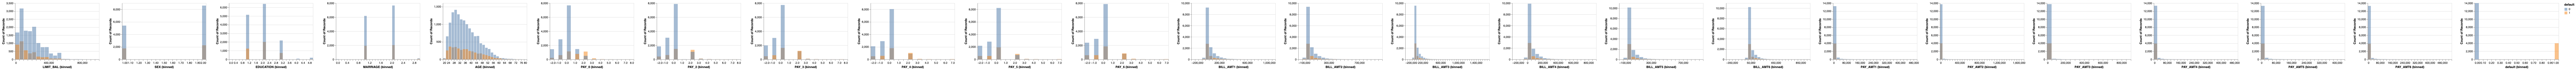

In [75]:
# plot distributions of all columns per two targets

plot_dis_num = alt.Chart(train_df).mark_bar(opacity=0.5).encode(
    alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40)),
    alt.Y('count()',stack= False),
    alt.Color('default:N')
).properties(
    width=300,
    height=200
).repeat(list(train_df.columns)
)

plot_dis_num

In [41]:
# calculate percentage of default payment for next month
round(sum(train_df['default'])/train_df.shape[0],2)

0.22

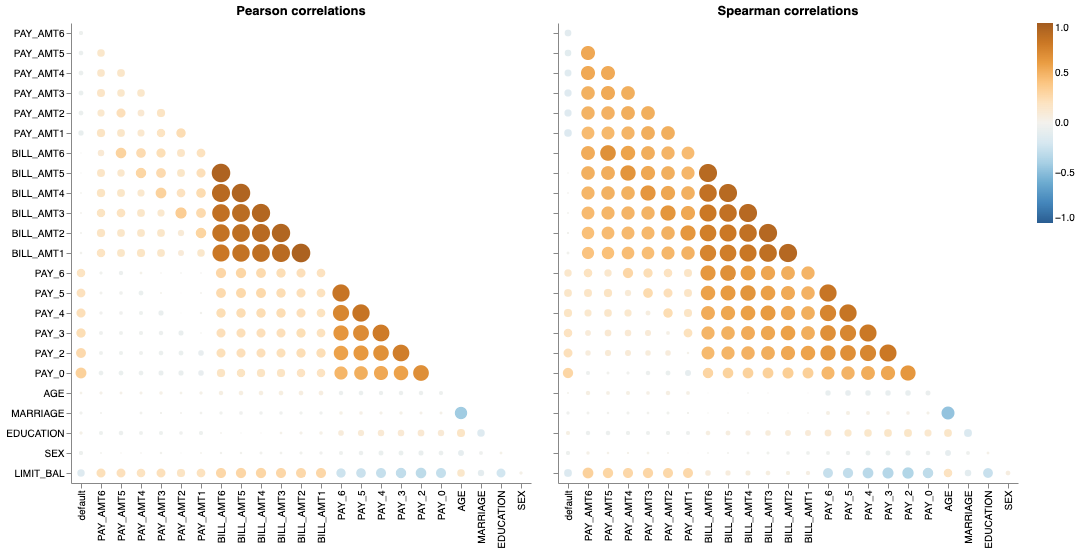

In [42]:
# below code adopted from MDS DSCI 573 Lab 3
aly.corr(train_df)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5


We wanted to take the weighted average for payment amounts and made new columns. Like the latest one has the largest weight. But we did not know what ratio should we use.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

We use binning for column `'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'` to transform continuous data to ordinal data with 4 groups and all bin has same width. We did this because it is easier to interpret bill amount as low, medium, high, extra high. 

We use log transformation for `LIMIT_BAL` because the distribution looks lognormal, and then we standardize the data.

We use one hot encoding instead of ordinal encoding for `"EDUCATION",'MARRIAGE'` because they contain unknown values.

We pass the rest because they are already clean.

In [43]:
from sklearn.preprocessing import (KBinsDiscretizer,PowerTransformer)

pass_features = ["SEX","AGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]

categorical_features = ["EDUCATION",'MARRIAGE']

bin_features = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

log_transform_features = ["LIMIT_BAL"]



numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

log_transformer = PowerTransformer(method='box-cox', standardize=True)

bin_transformer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

preprocessor = make_column_transformer(
    (bin_transformer, bin_features),
    (log_transformer, log_transform_features),
    (categorical_transformer, categorical_features),
    ("passthrough", pass_features),
)


preprocessor

ColumnTransformer(transformers=[('kbinsdiscretizer',
                                 KBinsDiscretizer(encode='ordinal', n_bins=4,
                                                  strategy='uniform'),
                                 ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                  'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']),
                                ('powertransformer',
                                 PowerTransformer(method='box-cox'),
                                 ['LIMIT_BAL']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['EDUCATION', 'MARRIAGE']),
                                ('passthrough', 'passthrough',
                                 ['SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
                                  'PAY_4', 'PAY_5', 'PAY_6'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

We use dummy model and decision tree as our baseline models. We wanted to use recall as our score metric because in default detection, we care more about how many true default cases the model have successfully detected. The cost of missing default cases is higher than manual re-inspection. But it is not always good just to use recall rate, so instead, we use AUC to evaluate the probability of a random true default case having a higher score than a random non default case. We could adjust the threshold to decide how aggressive we want our model to be. The decision tree has 0.61 of test AUC score and has poor discrimination ability.


In [44]:
# Reference to DSCI 573
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data
    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [45]:
scoring_metric = 'roc_auc'
results={}
dummy = DummyClassifier()
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
results["Decision tree"] = mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)
pd.DataFrame(results).T


,fit_time,score_time,test_score,train_score
Dummy,0.002 (+/- 0.001),0.001 (+/- 0.000),0.500 (+/- 0.000),0.500 (+/- 0.000)
Decision tree,0.054 (+/- 0.008),0.004 (+/- 0.001),0.607 (+/- 0.005),0.999 (+/- 0.000)


In [46]:
pipe_dt.fit(X_train, y_train)
ohe_feature_names = (
    pipe_dt.named_steps["columntransformer"]
    .named_transformers_['onehotencoder']
    .get_feature_names_out(categorical_features)
    .tolist()
    
)
feature_names = (
    bin_features + log_transform_features + ohe_feature_names + pass_features
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

We use `newton-cg` as our Logistic Ridge Regression solver because of converging issues. 

After 50 iteration of random search. We use C of 0.22 and balanced class weight. It seems that we are using regularization with small weights.

Using tuned hyperparameter, we apply cross validation with 5 folders and  we have validation AUC score of 0.719 with small deviation. It is better than our baseline decision tree model and reduce overfitting issue.

In [47]:
pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000,solver = 'newton-cg'))
param_dist = {
    "logisticregression__C": loguniform(1e-3, 1e3),
    "logisticregression__class_weight": ["balanced", None],
}
random_search = RandomizedSearchCV(  
    pipe_lr,
    param_distributions=param_dist,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    scoring=scoring_metric,
    random_state=123,
)
random_search.fit(X_train, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('kbinsdiscretizer',
                                                                               KBinsDiscretizer(encode='ordinal',
                                                                                                n_bins=4,
                                                                                                strategy='uniform'),
                                                                               ['BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('powertransformer',
                                                                               PowerTra...
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6'])])),
                                             ('logisticregression',
                                              LogisticRegression(max_iter=1000,
                                                                 solver='newton-cg'))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x107639630>,
                                        'logisticregression__class_weight': ['balanced',
                                                                             None]},
                   random_state=123, scoring='roc_auc', verbose=1)

In [48]:
best_parameters = random_search.best_params_ 
best_parameters

{'logisticregression__C': 0.22527090779355338,
 'logisticregression__class_weight': 'balanced'}

In [49]:
best_score = random_search.best_score_  
best_score

0.7188879916158646

In [50]:
results["logreg_tuned"] = mean_std_cross_val_scores(
    random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.002 (+/- 0.001),0.001 (+/- 0.000),0.500 (+/- 0.000),0.500 (+/- 0.000)
Decision tree,0.054 (+/- 0.008),0.004 (+/- 0.001),0.607 (+/- 0.005),0.999 (+/- 0.000)
logreg_tuned,0.129 (+/- 0.014),0.004 (+/- 0.000),0.719 (+/- 0.004),0.722 (+/- 0.004)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

We also use random forest, support vector machine and xgboost as our models. We can see svc has the most fitting time but has the similar validation auc score as tuned logistic model and also higher deviation. We can see for tree based models, the results are better than the linear models, but the trade off is the overfitting problem. xgboot has the best overall validation AUC scores and smallest overfitting problem among tree based models and relative small fit and score times. We will proceed with xgboost model for hyperparameter tuning.

In [51]:
# random forest 
pipe_rf = make_pipeline(
    preprocessor, RandomForestClassifier( random_state=123)
)
results["rf"] = mean_std_cross_val_scores(
    pipe_rf, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)

In [52]:
# svm 
pipe_svc = make_pipeline(
    preprocessor,SVC()
)
results["svc"] = mean_std_cross_val_scores(
    pipe_svc, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)

In [53]:
#XGB 
pipe_xgb = make_pipeline(
    preprocessor,
    XGBClassifier(
        random_state=123, verbosity=0
    ),
)
results["xgb"] = mean_std_cross_val_scores(
    pipe_xgb, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.002 (+/- 0.001),0.001 (+/- 0.000),0.500 (+/- 0.000),0.500 (+/- 0.000)
Decision tree,0.054 (+/- 0.008),0.004 (+/- 0.001),0.607 (+/- 0.005),0.999 (+/- 0.000)
logreg_tuned,0.129 (+/- 0.014),0.004 (+/- 0.000),0.719 (+/- 0.004),0.722 (+/- 0.004)
rf,0.704 (+/- 0.023),0.053 (+/- 0.001),0.727 (+/- 0.002),0.998 (+/- 0.001)
svc,4.448 (+/- 0.071),1.139 (+/- 0.011),0.714 (+/- 0.011),0.717 (+/- 0.004)
xgb,0.442 (+/- 0.008),0.006 (+/- 0.000),0.753 (+/- 0.010),0.880 (+/- 0.006)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [54]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

After hyperparameter optimization. We further increased the validation AUC score and we have eliminate the overfitting issue.

In [55]:
pipe_xgb_tun = Pipeline([
        ("process", preprocessor),
        ("xgb_tun",  XGBClassifier(
        random_state=123, verbosity=0
    ))])


param_dist = {
        "xgb_tun__n_estimators": range(5,71,1),
        "xgb_tun__max_depth": range(3,20,1),}


random_search = RandomizedSearchCV(  
    pipe_xgb_tun,
    param_distributions=param_dist,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    scoring=scoring_metric,
    random_state=123,
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('process',
                                              ColumnTransformer(transformers=[('kbinsdiscretizer',
                                                                               KBinsDiscretizer(encode='ordinal',
                                                                                                n_bins=4,
                                                                                                strategy='uniform'),
                                                                               ['BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_AMT6']),
                                                                              ('powertransformer',
                                                                               PowerTransformer(m...
                                                            max_delta_step=None,
                                                            max_depth=None,
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            n_estimators=100,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            predictor=None,
                                                            random_state=123, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'xgb_tun__max_depth': range(3, 20),
                                        'xgb_tun__n_estimators': range(5, 71)},
                   random_state=123, scoring='roc_auc', verbose=1)

In [56]:
best_parameters = random_search.best_params_ 
best_parameters

{'xgb_tun__n_estimators': 25, 'xgb_tun__max_depth': 4}

In [57]:
best_score = random_search.best_score_  
best_score

0.7703655602993292

In [58]:
results["xgb_tuned"] = mean_std_cross_val_scores(
    random_search.best_estimator_, X_train, y_train, return_train_score=True, scoring=scoring_metric
    
)
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.002 (+/- 0.001),0.001 (+/- 0.000),0.500 (+/- 0.000),0.500 (+/- 0.000)
Decision tree,0.054 (+/- 0.008),0.004 (+/- 0.001),0.607 (+/- 0.005),0.999 (+/- 0.000)
logreg_tuned,0.129 (+/- 0.014),0.004 (+/- 0.000),0.719 (+/- 0.004),0.722 (+/- 0.004)
rf,0.704 (+/- 0.023),0.053 (+/- 0.001),0.727 (+/- 0.002),0.998 (+/- 0.001)
svc,4.448 (+/- 0.071),1.139 (+/- 0.011),0.714 (+/- 0.011),0.717 (+/- 0.004)
xgb,0.442 (+/- 0.008),0.006 (+/- 0.000),0.753 (+/- 0.010),0.880 (+/- 0.006)
xgb_tuned,0.088 (+/- 0.009),0.005 (+/- 0.000),0.770 (+/- 0.008),0.797 (+/- 0.002)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

We can see the latest payment delay status is the most important feature and as the value increases, it is more likely for that client to commit payment default, which makes senses.  The second important feature is the amount of credits in dollars, and higher amount is associated with lower risk of committing default. This also makes senses because the credit amount is accumulated gradually. Only a good record will result in a high credit limit.

In [63]:
# conda install -c conda-forge ipywidgets
# jupyter nbextension enable --py widgetsnbextension
shap.initjs()
preprocessor.fit(X_train)
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

In [64]:
xgb_explainer = shap.TreeExplainer(random_search.best_estimator_.named_steps['xgb_tun'])
train_xgb_shap_values = xgb_explainer.shap_values(X_train_enc)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


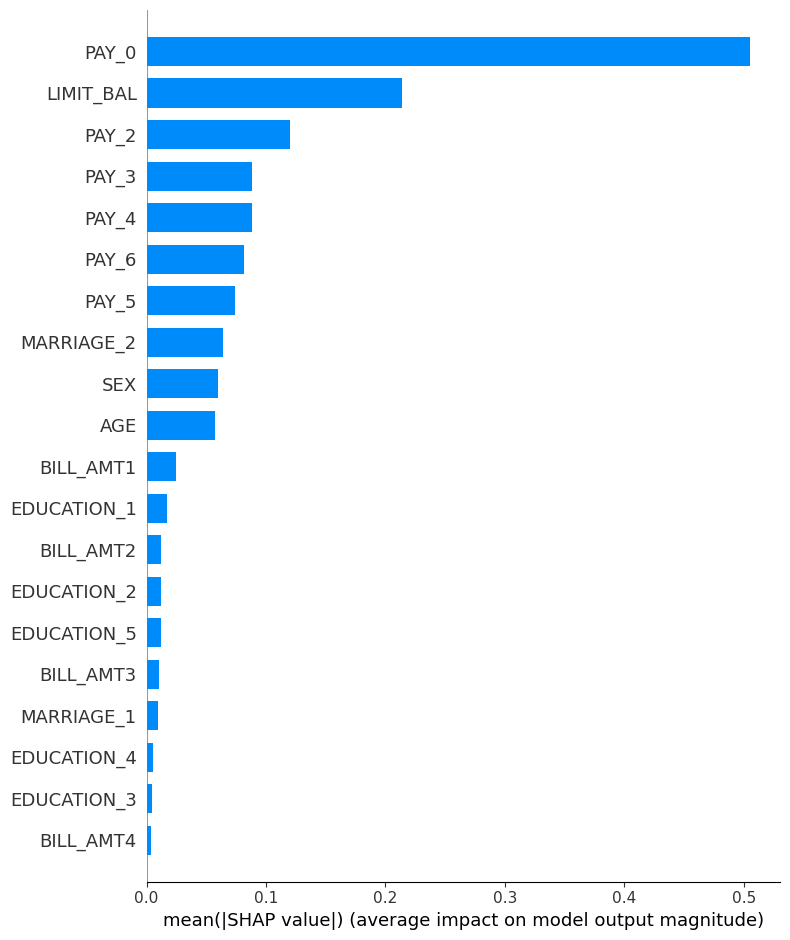

In [65]:
shap.summary_plot(train_xgb_shap_values, X_train_enc, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


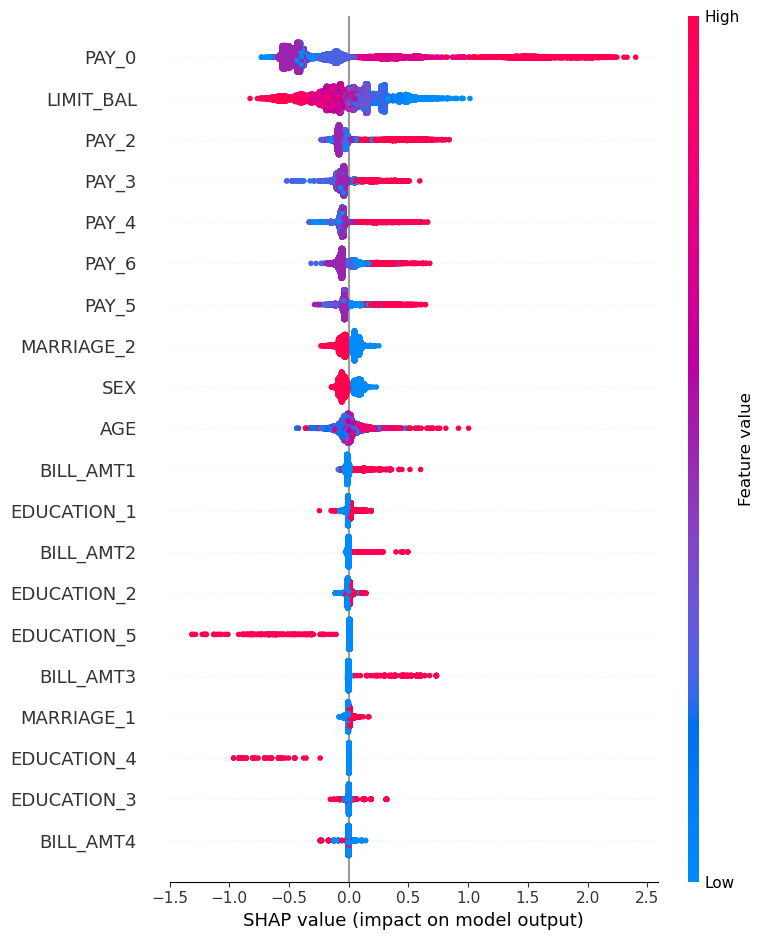

In [66]:
shap.summary_plot(train_xgb_shap_values, X_train_enc)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The test AUC score is close to the validation AUC score. Since we have test score slightly lower than validation score and the validation score is slightly lower than training score, our model does not have overfitting problem and performs fairly well. 

For a single test default case, the model successfully predicted the outcome. As with the importance of the features described above, the high value of the latest payment delay is a key factor in the model making this prediction.

In [67]:
test_score = random_search.score(X_test, y_test)
test_score

0.7698873738565919

In [68]:
# True test target value
y_test.iloc[2]

1

In [69]:
# Predicted test target value
random_search.best_estimator_.named_steps['xgb_tun'].predict(X_test_enc)[2]

1

In [70]:
# Predicted test target probability 
random_search.best_estimator_.named_steps['xgb_tun'].predict_proba(X_test_enc)[2]

array([0.3999713, 0.6000287], dtype=float32)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


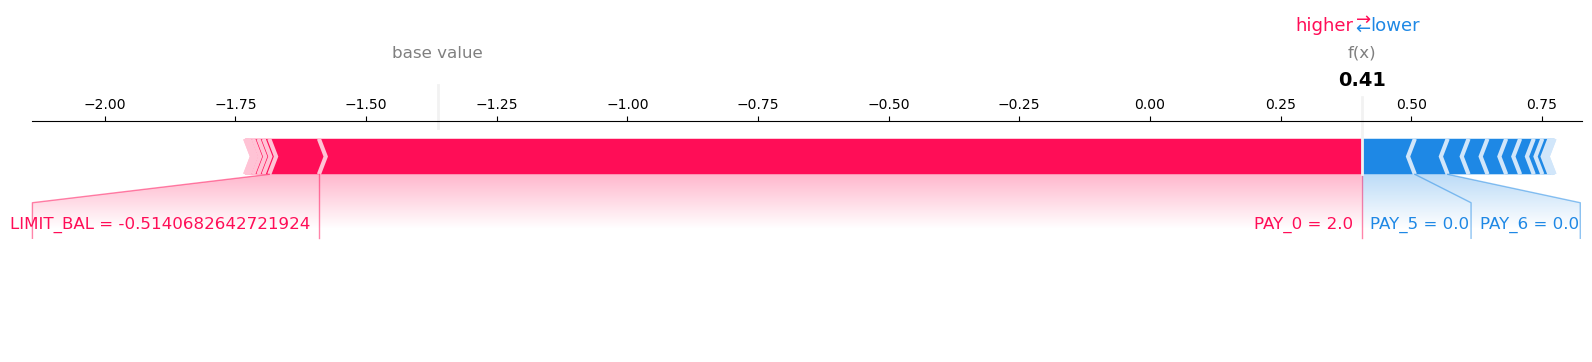

In [71]:
test_xgb_shap_values = xgb_explainer.shap_values(X_test_enc)
shap.force_plot(
    xgb_explainer.expected_value, 
    test_xgb_shap_values[2,:], 
    X_test_enc.iloc[2, :], 
    matplotlib=True,
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: